In [1]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import tracemalloc
import math
import numpy as np

In [2]:
def chroma_key(img_input, img_chromakey, color2change, treshold):
  """
  color2change: BGR!!!
  """
  if img_input.shape != img_chromakey.shape:
    raise TypeError(f"incorrect size: {img_input.shape} != {img_chromakey.shape}")
  rows_len = img_input.shape[0]
  columns_len = img_input.shape[1]
  for row in range(rows_len):
    for column in range(columns_len):
      pixel = img_input[row][column]
      pixel2 = img_chromakey[row][column]

      if math.dist(pixel, color2change) < treshold:
        img_input[row][column] = img_chromakey[row][column]
  return img_input

In [3]:
def chroma_key_2(img_input, img_chromakey, color2change, threshold):
    if img_input.shape != img_chromakey.shape:
        raise ValueError(f"Image shapes mismatch: {img_input.shape} != {img_chromakey.shape}")

    color = np.array(color2change, dtype=np.uint8).reshape(1, 1, 3)

    diff = img_input.astype(np.float32) - color.astype(np.float32)
    dist_sq = np.sum(diff**2, axis=2)

    mask = dist_sq < (threshold ** 2)

    mask_3ch = mask[:, :, np.newaxis]
    result = np.where(mask_3ch, img_chromakey, img_input)

    return result.astype(np.uint8)

In [70]:
def chroma_key_fast(img_input, img_chromakey, color2change, treshold):
    if img_input.shape != img_chromakey.shape:
        raise TypeError(f"incorrect size: {img_input.shape} != {img_chromakey.shape}")

    diff = img_input.astype(np.float32) - color2change
    dist = np.sqrt(np.sum(diff**2, axis=2))
    mask = dist < treshold

    img_input[mask] = img_chromakey[mask]

    return img_input

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_input = r"/content/drive/MyDrive/CV/шалунишки.jpg"
path_output = r"/content/drive/MyDrive/CV/типо_на_конференции.jpg"

### пример использования

In [6]:
custom_change_color = (204, 222, 233) #BGR

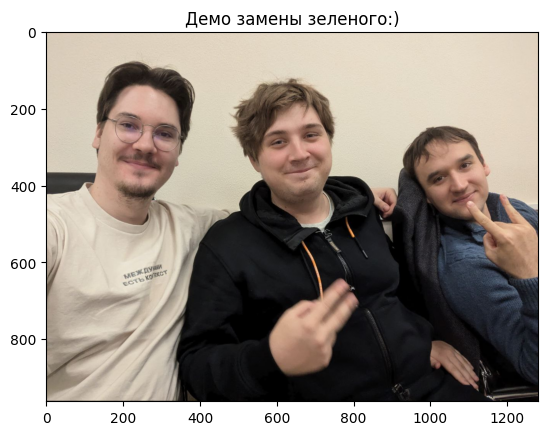

In [7]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))

imgfinal = chroma_key(img_inp, img_back, (0, 255, 0), 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо замены зеленого:)")
plt.show()

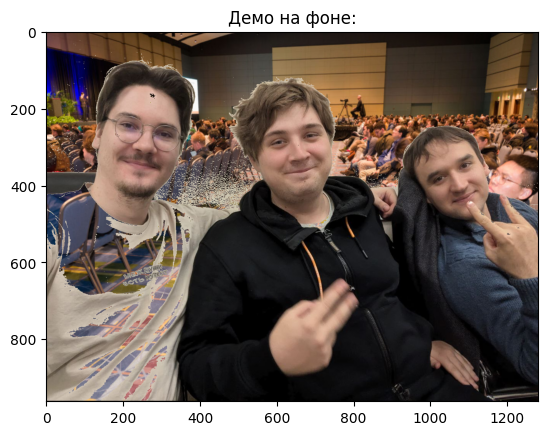

In [8]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне:")
plt.show()

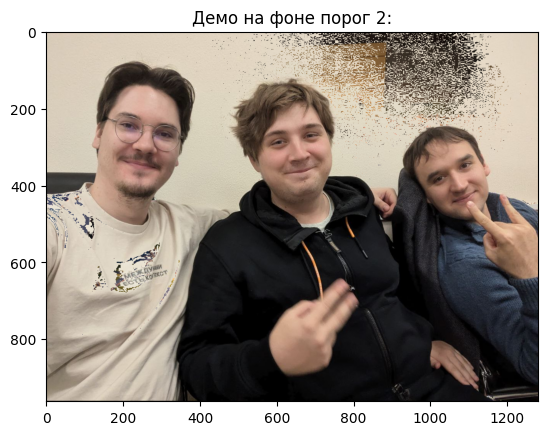

In [9]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 5)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 2:")
plt.show()

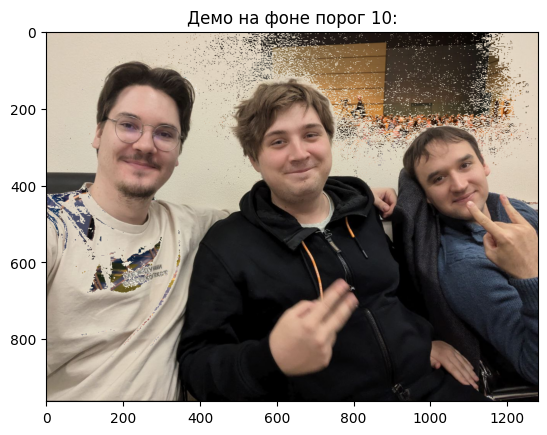

In [10]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 10)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 10:")
plt.show()

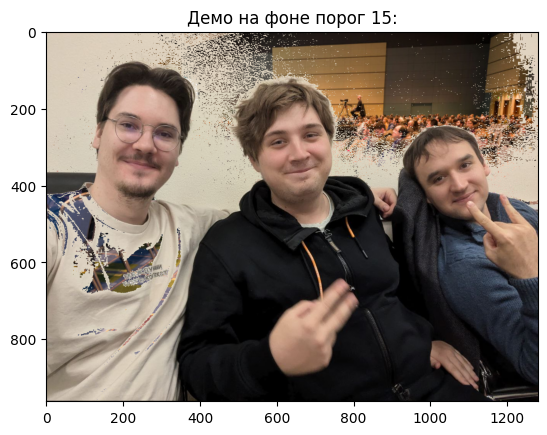

In [11]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 15)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 15:")
plt.show()

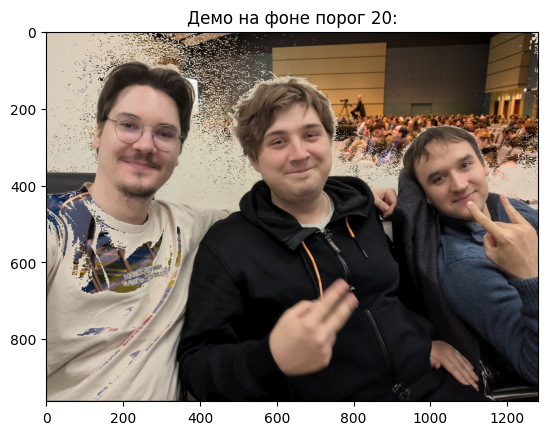

In [12]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 20)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 20:")
plt.show()

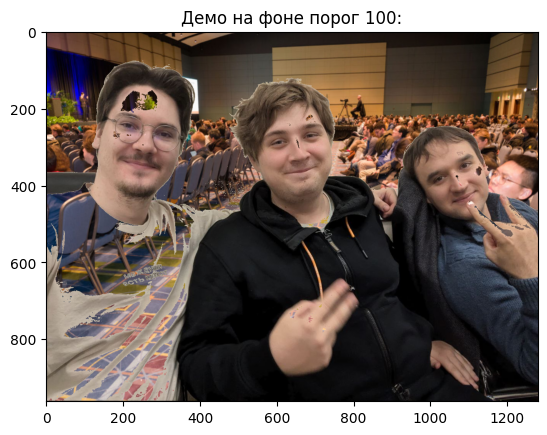

In [13]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 60)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 100:")
plt.show()

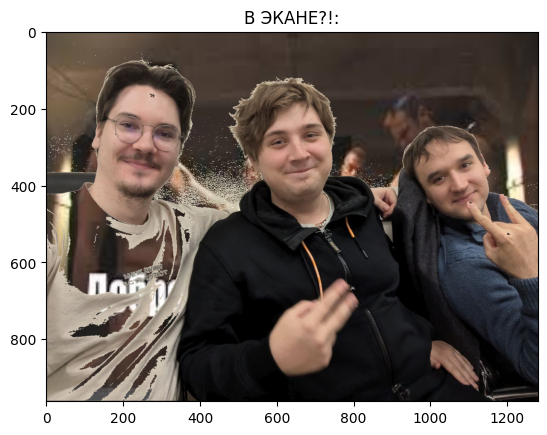

In [14]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(r"/content/drive/MyDrive/CV/типо_в_экане.jpg")
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("В ЭКАНЕ?!:")
plt.show()

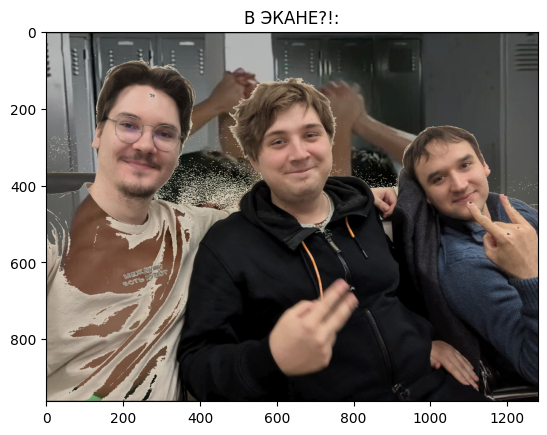

In [15]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(r"/content/drive/MyDrive/CV/типо_в_экане_2.jpg")
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("В ЭКАНЕ?!:")
plt.show()

### Пример замера времени

In [16]:
tracemalloc.start()
chroma_key(img_inp, img_back, custom_change_color, 40)
current, peak = tracemalloc.get_traced_memory()
print(f"Current: {current / 1024 / 1024:.2f} MB, Peak: {peak / 1024 / 1024:.2f} MB")
tracemalloc.stop()

Current: 0.00 MB, Peak: 0.02 MB


### Запуск на 100 фотках

In [7]:
path_input = r"/content/drive/MyDrive/CV/шалунишки.jpg"
path_output = r"/content/drive/MyDrive/CV/типо_на_конференции.jpg"

In [22]:
result_df = {}

In [23]:
import timeit
from copy import deepcopy
from tqdm import tqdm
import pandas as pd

In [47]:
import time

In [59]:
img_interest_size = range(10, 600, 10)
img_inp_o = cv2.imread(path_input)
img_back_o = cv2.imread(path_output)

for interest_configuration in tqdm(img_interest_size, desc="Benchmarking chroma key"):
  img_inp = cv2.resize(deepcopy(img_inp_o), (interest_configuration, interest_configuration))
  img_back = cv2.resize(deepcopy(img_back_o), (interest_configuration, interest_configuration))

  tracemalloc.start()
  chroma_key(img_inp, img_back, custom_change_color, 40)
  current, peak = tracemalloc.get_traced_memory()
  tracemalloc.stop()
  peak = peak / 1024 / 1024
  tracemalloc.reset_peak()


  # t = timeit.timeit(
  #     lambda: chroma_key(img_inp, img_back, custom_change_color, 40),
  #     number=10
  # )
  # t /= 10
  previous = time.time()  # ⬅️ record start time
  chroma_key(img_inp, img_back, custom_change_color, 40)
  t = time.time() - previous


  result_df[f"our_interest_configuration_{interest_configuration}"] = {
      "time": t,
      "memory_peak": peak,
      "memory_current": current / 1024 / 1024
  }

Benchmarking chroma key: 100%|██████████| 59/59 [03:02<00:00,  3.10s/it]


In [71]:
img_interest_size = range(10, 600, 10)
img_inp_o = cv2.imread(path_input)
img_back_o = cv2.imread(path_output)

for interest_configuration in tqdm(img_interest_size, desc="Benchmarking chroma key CV-2"):
  img_inp = cv2.resize(deepcopy(img_inp_o), (interest_configuration, interest_configuration))
  img_back = cv2.resize(deepcopy(img_back_o), (interest_configuration, interest_configuration))

  tracemalloc.start()
  chroma_key_2(img_inp, img_back, custom_change_color, 40)
  current, peak = tracemalloc.get_traced_memory()
  tracemalloc.stop()
  peak = peak / 1024 / 1024
  tracemalloc.reset_peak()


  # t = timeit.timeit(
  #     lambda: chroma_key_2(img_inp, img_back, custom_change_color, 40),
  #     number=10
  # )
  # t /= 10
  previous = time.time()  # ⬅️ record start time
  chroma_key_2(img_inp, img_back, custom_change_color, 40)
  t = time.time() - previous

  result_df[f"cv2_interest_configuration_{interest_configuration}"] = {
      "time": t,
      "memory_peak": peak,
      "memory_current": current / 1024 / 1024
  }

Benchmarking chroma key CV-2: 100%|██████████| 59/59 [00:01<00:00, 47.38it/s]


In [72]:
img_interest_size = range(10, 600, 10)
img_inp_o = cv2.imread(path_input)
img_back_o = cv2.imread(path_output)

for interest_configuration in tqdm(img_interest_size, desc="Benchmarking chroma key CV-2"):
  img_inp = cv2.resize(deepcopy(img_inp_o), (interest_configuration, interest_configuration))
  img_back = cv2.resize(deepcopy(img_back_o), (interest_configuration, interest_configuration))

  tracemalloc.start()
  chroma_key_fast(img_inp, img_back, custom_change_color, 40)
  current, peak = tracemalloc.get_traced_memory()
  tracemalloc.stop()
  peak = peak / 1024 / 1024
  tracemalloc.reset_peak()


  # t = timeit.timeit(
  #     lambda: chroma_key_2(img_inp, img_back, custom_change_color, 40),
  #     number=10
  # )
  # t /= 10
  previous = time.time()  # ⬅️ record start time
  chroma_key_fast(img_inp, img_back, custom_change_color, 40)
  t = time.time() - previous

  result_df[f"chroma_key_fast_{interest_configuration}"] = {
      "time": t,
      "memory_peak": peak,
      "memory_current": current / 1024 / 1024
  }

Benchmarking chroma key CV-2: 100%|██████████| 59/59 [00:01<00:00, 36.05it/s]


In [73]:
pd.DataFrame(result_df)

our_interest_configuration_10  our_interest_configuration_20  \
time                                 0.000248                       0.001015   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                our_interest_configuration_30  our_interest_configuration_40  \
time                                 0.002898                       0.003358   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                our_interest_configuration_50  cv2_interest_configuration_10  \
time                                 0.005256                       0.000127   
memory_peak                          0.000558                       0.005095   
memory_current                       0.000000                       0.000053   

                cv2_interest_configuration_20  cv2_interest_configuration_30  \
time                                 0.000073                       0.000072   
memory_peak                          0.016540                       0.035613   
memory_current                       0.000053                       0.000053   

                cv2_interest_configuration_40  cv2_interest_configuration_50  \
time                                 0.000143                       0.000148   
memory_peak                          0.062316                       0.096648   
memory_current                       0.000053                       0.000053   

                ...  chroma_key_fast_500  chroma_key_fast_510  \
time            ...             0.024025             0.024799   
memory_peak     ...            13.415039            13.954437   
memory_current  ...             0.000000             0.000000   

                chroma_key_fast_520  chroma_key_fast_530  chroma_key_fast_540  \
time                       0.026858             0.025218             0.026569   
memory_peak               14.504578            15.065338            15.636719   
memory_current             0.000061             0.000061             0.000000   

                chroma_key_fast_550  chroma_key_fast_560  chroma_key_fast_570  \
time                       0.019463             0.021077             0.021704   
memory_peak               16.218842            16.811646            17.415489   
memory_current             0.000000             0.000000             0.000217   

                chroma_key_fast_580  chroma_key_fast_590  
time                       0.021460             0.030758  
memory_peak               18.029297            18.654144  
memory_current             0.000000             0.000000  

[3 rows x 177 columns]

In [62]:
pd.DataFrame(result_df)

our_interest_configuration_10  our_interest_configuration_20  \
time                                 0.000248                       0.001015   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                our_interest_configuration_30  our_interest_configuration_40  \
time                                 0.002898                       0.003358   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                our_interest_configuration_50  cv2_interest_configuration_10  \
time                                 0.005256                       0.000283   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                cv2_interest_configuration_20  cv2_interest_configuration_30  \
time                                 0.000248                       0.000206   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                cv2_interest_configuration_40  cv2_interest_configuration_50  \
time                                 0.000268                       0.000271   
memory_peak                          0.000558                       0.000558   
memory_current                       0.000000                       0.000000   

                ...  cv2_interest_configuration_500  \
time            ...                        0.013113   
memory_peak     ...                        0.000897   
memory_current  ...                        0.000217   

                cv2_interest_configuration_510  \
time                                  0.021473   
memory_peak                           0.002373   
memory_current                        0.000362   

                cv2_interest_configuration_520  \
time                                  0.014358   
memory_peak                           0.002403   
memory_current                        0.000362   

                cv2_interest_configuration_530  \
time                                  0.020663   
memory_peak                           0.000897   
memory_current                        0.000217   

                cv2_interest_configuration_540  \
time                                  0.014138   
memory_peak                           0.002373   
memory_current                        0.000362   

                cv2_interest_configuration_550  \
time                                  0.024148   
memory_peak                           0.002538   
memory_current                        0.000497   

                cv2_interest_configuration_560  \
time                                  0.017144   
memory_peak                           0.002373   
memory_current                        0.000362   

                cv2_interest_configuration_570  \
time                                  0.024735   
memory_peak                           0.000897   
memory_current                        0.000217   

                cv2_interest_configuration_580  cv2_interest_configuration_590  
time                                  0.020480                        0.021228  
memory_peak                           0.002373                        0.002403  
memory_current                        0.000362                        0.000362  

[3 rows x 118 columns]

In [77]:
df_wide = pd.DataFrame(result_df)
df = df_wide.T.reset_index()
df.rename(columns={"index": "key"}, inplace=True)

# Определяем метод по ключу
def classify_method(key):
    if key.startswith("our_") and "fast" not in key:
        return 0  # наш оригинальный медленный метод (e.g. our_interest_configuration_10)
    elif "fast" in key or key == "chroma_key_fast":
        return 1  # наш ускоренный метод
    elif key.startswith("cv2_"):
        return 2  # OpenCV
    else:
        raise ValueError(f"Неизвестный ключ: {key}")

df["is_cv2"] = df["key"].apply(classify_method)

# Извлекаем номер конфигурации (оставляем только числовой ID или общий суффикс)
df["interest_configuration"] = df["key"].str.replace(r"^(our_|cv2_|chroma_key_)", "", regex=True)

# Убираем исходный ключ — он больше не нужен
df = df.drop(columns=["key"])

df

time  memory_peak  memory_current  is_cv2     interest_configuration
0    0.000248     0.000558        0.000000       0  interest_configuration_10
1    0.001015     0.000558        0.000000       0  interest_configuration_20
2    0.002898     0.000558        0.000000       0  interest_configuration_30
3    0.003358     0.000558        0.000000       0  interest_configuration_40
4    0.005256     0.000558        0.000000       0  interest_configuration_50
..        ...          ...             ...     ...                        ...
172  0.019463    16.218842        0.000000       1                   fast_550
173  0.021077    16.811646        0.000000       1                   fast_560
174  0.021704    17.415489        0.000217       1                   fast_570
175  0.021460    18.029297        0.000000       1                   fast_580
176  0.030758    18.654144        0.000000       1                   fast_590

[177 rows x 5 columns]

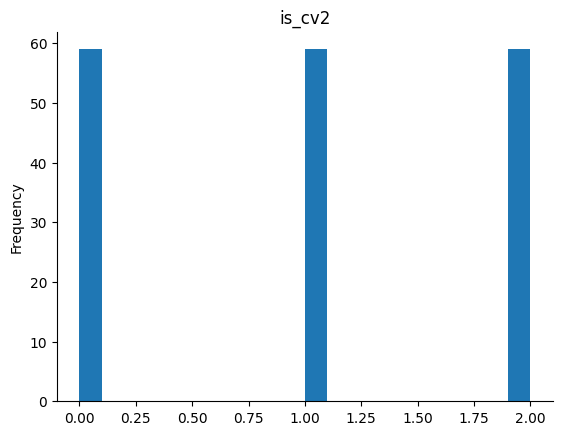

In [78]:
from matplotlib import pyplot as plt
df['is_cv2'].plot(kind='hist', bins=20, title='is_cv2')
plt.gca().spines[['top', 'right',]].set_visible(False)

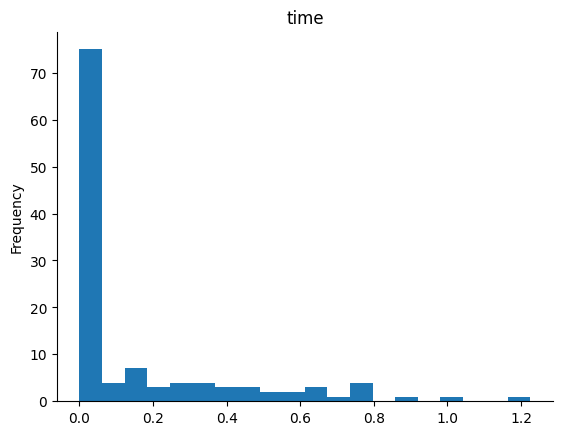

In [64]:
from matplotlib import pyplot as plt
df['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
df

time  memory_peak  memory_current  is_cv2      interest_configuration
0    0.000248     0.000558        0.000000       0   interest_configuration_10
1    0.001015     0.000558        0.000000       0   interest_configuration_20
2    0.002898     0.000558        0.000000       0   interest_configuration_30
3    0.003358     0.000558        0.000000       0   interest_configuration_40
4    0.005256     0.000558        0.000000       0   interest_configuration_50
..        ...          ...             ...     ...                         ...
113  0.024148     0.002538        0.000497       1  interest_configuration_550
114  0.017144     0.002373        0.000362       1  interest_configuration_560
115  0.024735     0.000897        0.000217       1  interest_configuration_570
116  0.020480     0.002373        0.000362       1  interest_configuration_580
117  0.021228     0.002403        0.000362       1  interest_configuration_590

[118 rows x 5 columns]

In [79]:
df_sorted = df.sort_values('interest_configuration').reset_index(drop=True)
df_cv2_2 = df_sorted[df_sorted['is_cv2'] == 2]
df_cv2 = df_sorted[df_sorted['is_cv2'] == 1]
df_our = df_sorted[df_sorted['is_cv2'] == 0]

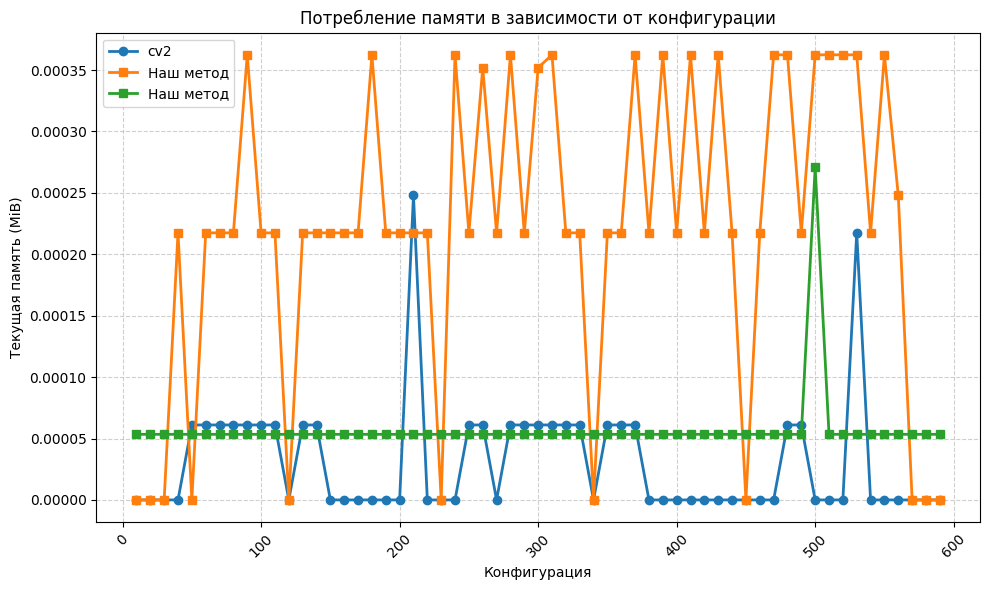

In [81]:
configs = df_cv2['interest_configuration'].values * 10
configs = list(range(len(configs)))
configs = [x*10 + 10 for x in configs]

plt.figure(figsize=(10, 6))
plt.plot(configs, df_cv2['memory_current'], marker='o', label='cv2', linewidth=2)
plt.plot(configs, df_our['memory_current'], marker='s', label='Наш метод', linewidth=2)
plt.plot(configs, df_cv2_2['memory_current'], marker='s', label='Наш метод', linewidth=2)
plt.title('Потребление памяти в зависимости от конфигурации')
plt.xlabel('Конфигурация')
plt.ylabel('Текущая память (MiB)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

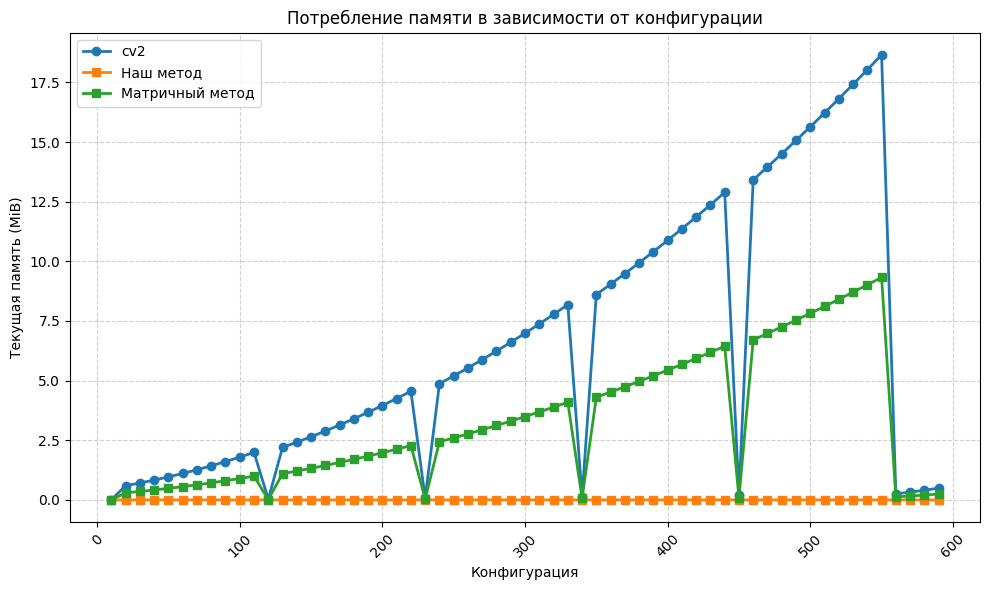

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(configs, df_cv2['memory_peak'], marker='o', label='cv2', linewidth=2)
plt.plot(configs, df_our['memory_peak'], marker='s', label='Наш метод', linewidth=2)
plt.plot(configs, df_cv2_2['memory_peak'], marker='s', label='Матричный метод', linewidth=2)
plt.title('Потребление памяти в зависимости от конфигурации')
plt.xlabel('Конфигурация')
plt.ylabel('Текущая память (MiB)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

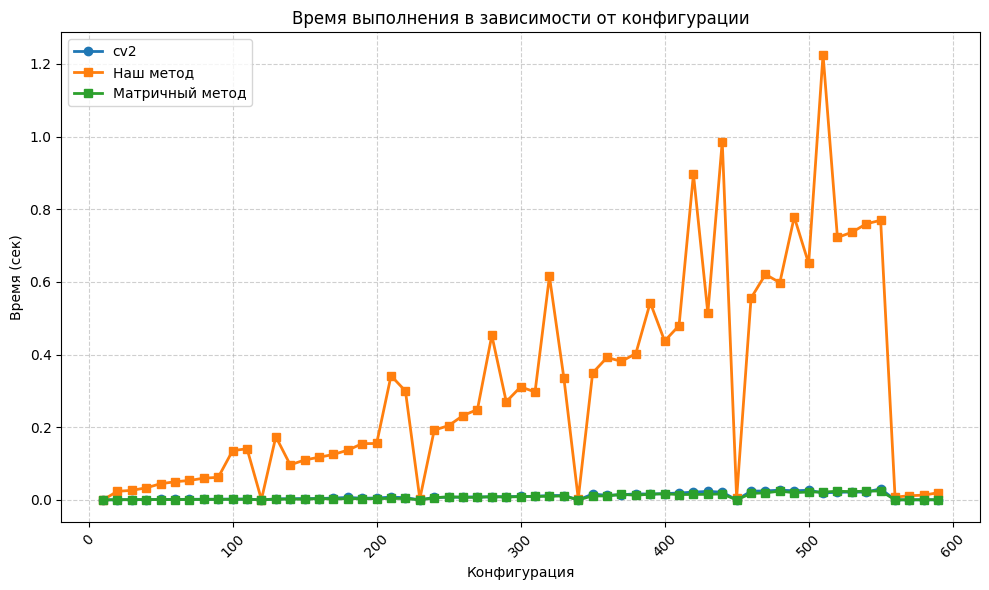

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(configs, df_cv2['time'], marker='o', label='cv2', linewidth=2)
plt.plot(configs, df_our['time'], marker='s', label='Наш метод', linewidth=2)
plt.plot(configs, df_cv2_2['time'], marker='s', label='Матричный метод', linewidth=2)
plt.title('Время выполнения в зависимости от конфигурации')
plt.xlabel('Конфигурация')
plt.ylabel('Время (сек)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(configs, df_cv2['time'], marker='o', label='cv2', linewidth=2)
plt.plot(configs, df_our['time'], marker='s', label='Наш метод', linewidth=2)
plt.plot(configs, df_cv2_2['time'], marker='s', label='Матричный метод', linewidth=2)
plt.title('Время выполнения в зависимости от конфигурации')
plt.xlabel('Конфигурация')
plt.ylabel('Время (сек)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

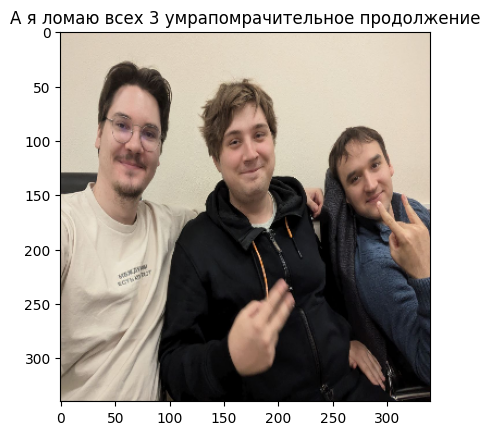

In [86]:
img_inp_o = cv2.imread(path_input)
img_inp = cv2.resize(deepcopy(img_inp_o), (340, 340))
plt.imshow(img_inp[:,:,::-1])
plt.title("А я ломаю всех 3 умрапомрачительное продолжение")
plt.show()

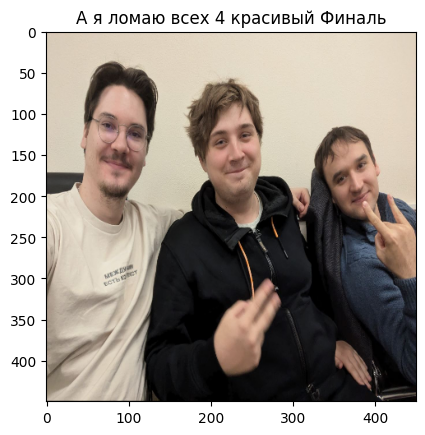

In [87]:
img_inp_o = cv2.imread(path_input)
img_inp = cv2.resize(deepcopy(img_inp_o), (450, 450))
plt.imshow(img_inp[:,:,::-1])
plt.title("А я ломаю всех 4 красивый Финаль")
plt.show()

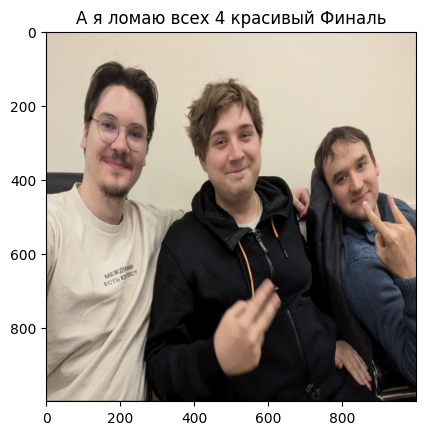

In [88]:
img_inp_o = cv2.imread(path_input)
img_inp = cv2.resize(deepcopy(img_inp_o), (1000, 1000))
plt.imshow(img_inp[:,:,::-1])
plt.title("А я ломаю всех 4 красивый Финаль")
plt.show()

In [57]:
df_cv2[df_cv2["interest_configuration"] == "interest_configuration_120"]

time  memory_peak  memory_current  is_cv2      interest_configuration
7  0.000745     0.000558             0.0       1  interest_configuration_120

In [58]:
df_cv2[df_cv2["interest_configuration"] == "interest_configuration_110"]

time  memory_peak  memory_current  is_cv2      interest_configuration
5  0.0006     0.000775        0.000217       1  interest_configuration_110